In [2]:
import os
import torchaudio
import torchvision
import torchaudio.transforms as T_audio
import torchvision.transforms as t
import torch.utils.data as data
import torch
from torch.utils import data
from utils_dir import transforms
import torchvision
import config
import numpy as np
import pandas as pd
import librosa

In [3]:
path = "E:/ADSIM/Import-2023-04/data/2015-606/Heiligenstadt_2015_01_Data"
file_names = os.listdir(path)
file_names

['N81_602HS_000_2010-01-01_00-04-27_01.WAV',
 'N81_602HS_000_2010-01-01_00-04-41_01.WAV',
 'N81_602HS_000_2010-01-01_00-05-57_01.WAV',
 'N81_602HS_000_2010-01-01_00-06-11_01.WAV',
 'N81_602HS_000_2010-01-01_00-07-27_01.WAV',
 'N81_602HS_000_2010-01-01_00-07-41_01.WAV',
 'N81_602HS_000_2010-01-01_00-08-57_01.WAV',
 'N81_602HS_000_2010-01-01_00-09-11_01.WAV',
 'N81_602HS_000_2010-01-01_00-10-41_01.WAV',
 'N81_602HS_000_2010-01-01_00-12-11_01.WAV',
 'N81_602HS_000_2010-01-01_00-13-41_01.WAV',
 'N81_602HS_000_2010-01-01_00-15-11_01.WAV',
 'N81_602HS_000_2010-01-01_00-16-41_01.WAV',
 'N81_602HS_000_2010-01-01_00-18-11_01.WAV',
 'N81_602HS_000_2010-01-01_00-19-41_01.WAV',
 'N81_602HS_000_2016-03-31_21-44-00_01.WAV',
 'N81_602HS_000_2016-06-14_20-43-01_01.WAV',
 'N81_602HS_000_2016-09-11_22-44-21_01.WAV',
 'N81_602HS_000_2016-09-13_12-17-00_01.WAV',
 'N81_602HS_000_2016-10-12_03-12-07_01.WAV',
 'N81_602HS_000_2016-11-10_02-58-14_01.WAV',
 'N81_602HS_000_2017-01-07_10-52-25_01.WAV',
 'N81_602H

In [3]:
rate_list = []
for i in range(100):
    p = path + "/" + file_names[i]
    wave, rate = librosa.load(p)  
    rate_list.append(rate)

In [5]:
rate_list_torcha = []
for i in range(len(file_names)):
    p = path + "/" + file_names[i]
    wave, rate = torchaudio.load(p)
    rate_list_torcha.append(rate)
    #if rate != 44100:
    #    resampler = torchaudio.transforms.Resample(orig_freq=rate, new_freq=44100)
    #    waveform = resampler(wave)
    print(i, rate)

0 50000
1 50000
2 50000
3 50000
4 50000
5 50000
6 50000
7 50000
8 50000
9 50000
10 50000
11 50000
12 50000
13 50000
14 50000
15 50000
16 50000
17 50000
18 50000
19 50000
20 50000
21 50000
22 50000
23 50000
24 50000
25 50000
26 50000
27 50000
28 50000
29 50000
30 50000
31 50000
32 50000
33 50000
34 50000
35 50000
36 50000
37 50000
38 50000
39 50000
40 50000
41 50000
42 50000
43 50000
44 50000
45 50000
46 50000
47 50000
48 50000
49 50000
50 50000
51 50000
52 50000
53 50000
54 50000
55 50000
56 50000
57 50000
58 50000
59 50000
60 50000
61 50000
62 50000
63 50000
64 50000
65 50000
66 50000
67 50000
68 50000
69 50000
70 50000
71 50000
72 50000
73 50000
74 50000
75 50000
76 50000
77 50000
78 50000
79 50000
80 50000
81 50000
82 50000
83 50000
84 50000
85 50000
86 50000
87 50000
88 50000
89 50000
90 50000
91 50000
92 50000
93 50000
94 50000
95 50000
96 50000
97 50000
98 50000
99 50000
100 50000
101 50000
102 50000
103 50000
104 50000
105 50000
106 50000
107 50000
108 50000
109 50000
110 50000


In [5]:
#make summary of rate_list
rate_list = np.array(rate_list)
rate_list = pd.DataFrame(rate_list)
rate_list.describe()

,0
count,100.0
mean,22050.0
std,0.0
min,22050.0
25%,22050.0
50%,22050.0
75%,22050.0
max,22050.0


In [9]:
#make summary of rate_list_torcha
rate_list_torcha = np.array(rate_list_torcha)
rate_list_torcha = pd.DataFrame(rate_list_torcha)
rate_list_torcha.describe()
rate_list_torcha.mode()



,0
0,50000


In [4]:
labels_file = pd.read_csv('./data/labeled_ADSMI/labels_int.csv', index_col=0)


In [26]:
class MyDataset_finetune(data.Dataset):
    
    def __init__(self, train=True):
        self.root = './data/labeled_ADSMI/labeled_data_2013-535/'
        self.train = train
        
        #getting name of all files inside the all of the train_folds
        temp = os.listdir(self.root)
        temp.sort()
        self.file_names = []
        self.class_ids = []
        if self.train:
            for i in range(len(labels_file["Label_int"])):
                if int(labels_file["fold"][i]) in config.ADSMI_train_folds:
                    self.file_names.append(labels_file["filename"][i])
                    self.class_ids.append(labels_file["Label_int"][i])
        else:
            for i in range(len(labels_file["Label_int"])):
                if int(labels_file["fold"][i]) in config.ADSMI_test_fold:
                    self.file_names.append(labels_file["filename"][i])
                    self.class_ids.append(labels_file["Label_int"][i])
      
        
        if self.train:
            self.wave_transforms = torchvision.transforms.Compose([  
                                                              transforms.RandomScale(max_scale = 1.25), 
                                                              transforms.RandomPadding(out_len = 320000),
                                                              transforms.RandomCrop(out_len = 320000)])

            
        else: #for test
            self.wave_transforms = torchvision.transforms.Compose([ 
                                                              transforms.RandomPadding(out_len = 220500),
                                                             transforms.RandomCrop(out_len = 220500)])

        self.mel_spectrogram = T_audio.MelSpectrogram(sample_rate=32000, n_fft=1024, hop_length=320,n_mels=128)
        self.amplitude_to_db = T_audio.AmplitudeToDB()

    
    def __len__(self):
        return len(self.file_names)
    
    

    def __getitem__(self, index):
        file_name = self.file_names[index]  
        path = self.root + file_name
        
        # Using torchaudio to load waveform
        wave, rate = torchaudio.load(path)
        wave = wave.squeeze(0)  # Convert to numpy array for processing

        # Identifying the label of the sample from its name
        class_id = int(self.class_ids[index])
        
        if wave.ndim == 1:
            wave = wave[:, np.newaxis]
        
        # Normalizing waves to [-1, 1]
        if np.abs(wave.max()) > 1.0:
            wave = transforms.scale(wave, wave.min(), wave.max(), -1.0, 1.0)
        wave = wave.T * 32768.0
        
        nonzero_indices = wave.nonzero()

        if nonzero_indices.size(0) > 0:
            start = nonzero_indices[:, 1].min().item()
            end = nonzero_indices[:, 1].max().item()
            wave = wave[:, start: end + 1]
        else:
            # Create a default or zero tensor of appropriate shape for empty waveforms
            default_spec_shape = (config.channels, default_freq_dim, default_time_dim)
            return file_name, torch.zeros(default_spec_shape), class_id
        
        
        #wave = wave.numpy()
        #wave = self.wave_transforms(wave)
        #wave = torch.from_numpy(wave).float().squeeze(0)
        wave = self.wave_transforms(wave).float().squeeze(0)

        # Using torchaudio to compute melspectrogram
        s = T_audio.MelSpectrogram(sample_rate=32000, n_fft=1024, hop_length=320,n_mels=128)(wave).unsqueeze(0)
        
        # Masking the spectrograms
        log_s = T_audio.FrequencyMasking(freq_mask_param=80)(s)
        log_s = T_audio.TimeMasking(time_mask_param=80)(s)
        log_s = self.amplitude_to_db(log_s.squeeze(0))

        # Creating 3 channels by copying log_s 3 times 

        if config.channels == 3:
            spec = torch.stack([log_s, log_s, log_s]) # Using stack instead of cat

        else:
            spec = log_s
        
        #print("Waveform length:", wave.shape[0], "Expected length: 320000")

        #print("spec shape:", spec.shape)


        return file_name, spec, class_id,wave
    
def create_generators_finetune():
    train_dataset = MyDataset_finetune(train=True)
    test_dataset = MyDataset_finetune(train=False)
    

    train_loader = data.DataLoader(train_dataset, batch_size = config.batch_size, shuffle=True, num_workers=0 ,drop_last=False)
    
    test_loader = data.DataLoader(test_dataset, batch_size = config.batch_size, shuffle=True, num_workers=0 ,drop_last=False)
    
    return train_loader, test_loader

In [32]:
import torch

# 1. Load your dataset and create the DataLoader
train_loader, _ = create_generators_finetune()

# 2. Fetch the first batch of data from the train_loader
file_name, spectrogram, class_id, wave = next(iter(train_loader))


# 4. Display the shape of the spectrogram
print("Spectrogram shape:", spectrogram.shape)



TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

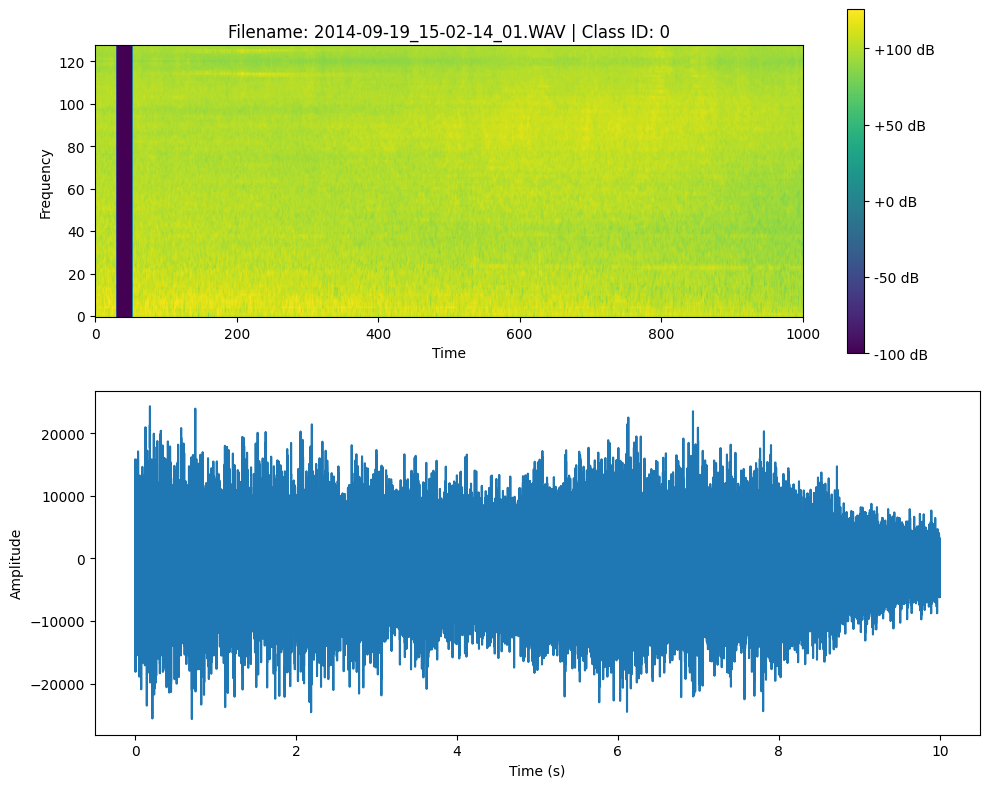

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Initialize the train_loader
train_loader, _ = create_generators_finetune()

# 2. Access the first batch of data
first_batch = next(iter(train_loader))
filenames, spectrograms, class_ids, wave = first_batch

# 3. Extract the first spectrogram, filename, class ID, and waveform
first_spectrogram = spectrograms[0]
first_filename = filenames[0]
first_class_id = class_ids[0]
first_waveform = wave[0].numpy()   # Assuming wave is added to the output of the DataLoader

# 4. Create a figure
plt.figure(figsize=(10, 8))

# 4.1. Plot the spectrogram
plt.subplot(2, 1, 1)
if first_spectrogram.shape[0] == 3:  # If it has 3 channels, pick one for visualization (e.g., the first channel)
    plt.imshow(first_spectrogram[0].numpy(), origin='lower', aspect=3)  # Stretch the y-axis
else:
    plt.imshow(first_spectrogram.numpy(), origin='lower')  # Stretch the y-axis

plt.colorbar(format='%+2.0f dB')
plt.title(f"Filename: {first_filename} | Class ID: {first_class_id}")
plt.xlabel("Time")
plt.ylabel("Frequency")

# 4.2. Plot the raw waveform
plt.subplot(2, 1, 2)
rate = 32000  # This is based on your previous code; adjust if different
times = np.linspace(0, len(first_waveform) / rate, num=len(first_waveform))
plt.plot(times, first_waveform)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()

plt.show()
